In [1]:
# Scientific libraries
import numpy_html
import numpy as np


import astropy.io.fits as fits
import astropy.units as u
import astropy.constants as const

# Graphic libraries

import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
plt.style.use('mike') 
jtplot.style(context='notebook', fscale=1, grid=False)

#useful libraries

from glob import glob
import copy
import collections
import warnings
warnings.simplefilter('ignore')


import cosmogrb

You do not have threeML installed


# Demo of Creating a GBM GRB

## Instantiate the GRB with its parameters

In [11]:
grb = cosmogrb.GBMGRB_CPL(
    ra=312.0,
    dec=-62.0,
    z=1.0,
    peak_flux=5e-7,
    alpha=-0.66,
    ep=500.0,
    tau=2.0,
    trise=1.0,
    tdecay=1.,
    duration=80.0,
    T0=0.1,
)

## Examine the latent lightcurve

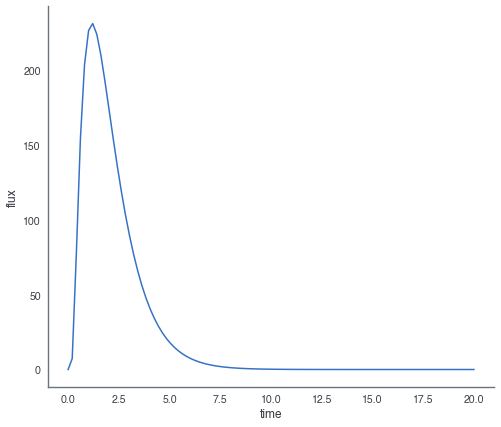

In [14]:
time = np.linspace(0, 20, 100)

grb.display_energy_integrated_light_curve(time);



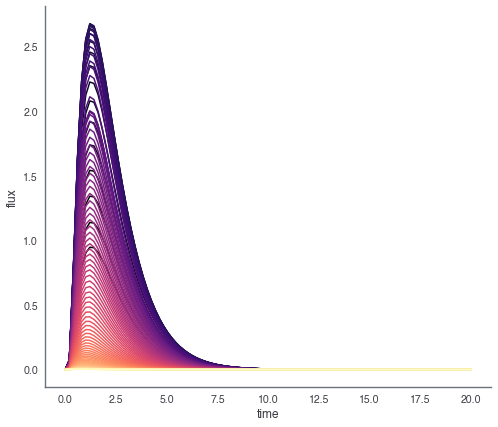

In [15]:
energy = np.logspace(1, 3, 100)

grb.display_energy_dependent_light_curve(time, energy, cmap='magma')

## Simulate the GRB 

In [16]:
grb.go(n_cores=6)

## Save the GRB to an HDF5 file

In [17]:
grb.save('test_grb.h5')

## Reload the GRB

In [2]:
grb_reload = cosmogrb.GRBSave.from_file('test_grb.h5')

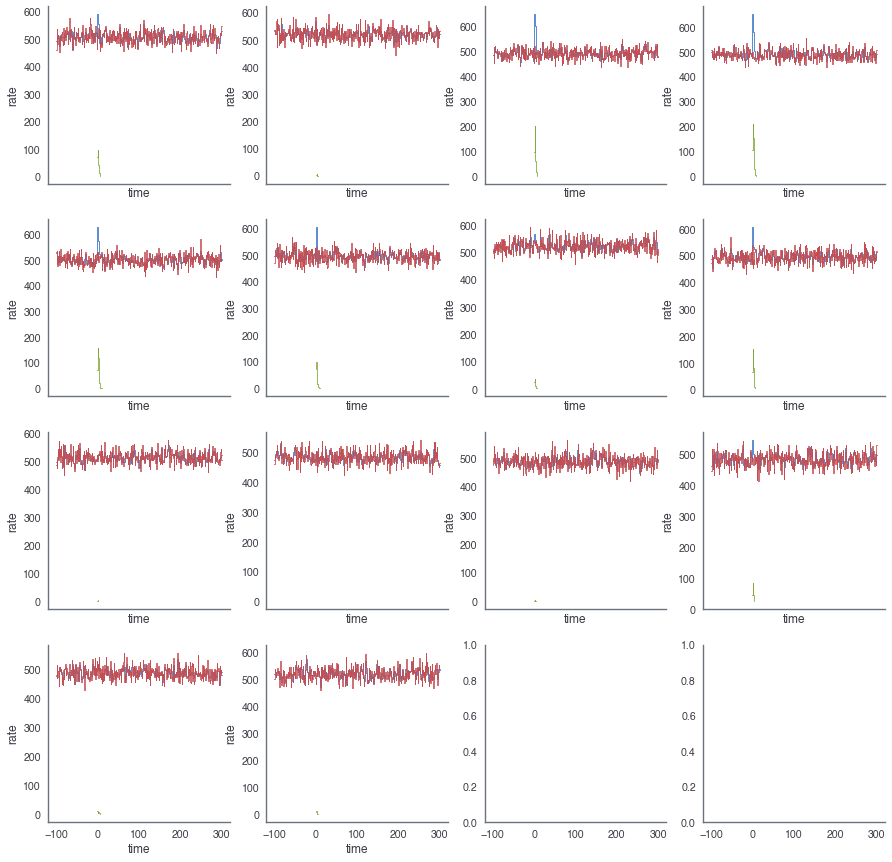

In [15]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=False,figsize=(15,15))
row=0
col = 0
for key in grb_reload.keys:
    ax = axes[row][col]
    
    lightcurve = grb_reload[key]['lightcurve']
    
    lightcurve.display_lightcurve(dt=2, ax=ax,lw=.8)
    lightcurve.display_source(ax=ax,lw=.8)
    lightcurve.display_background(ax=ax,lw=.8)
    
    if col < 3:
        col+=1
    else:
        row+=1
        col=0
    
    

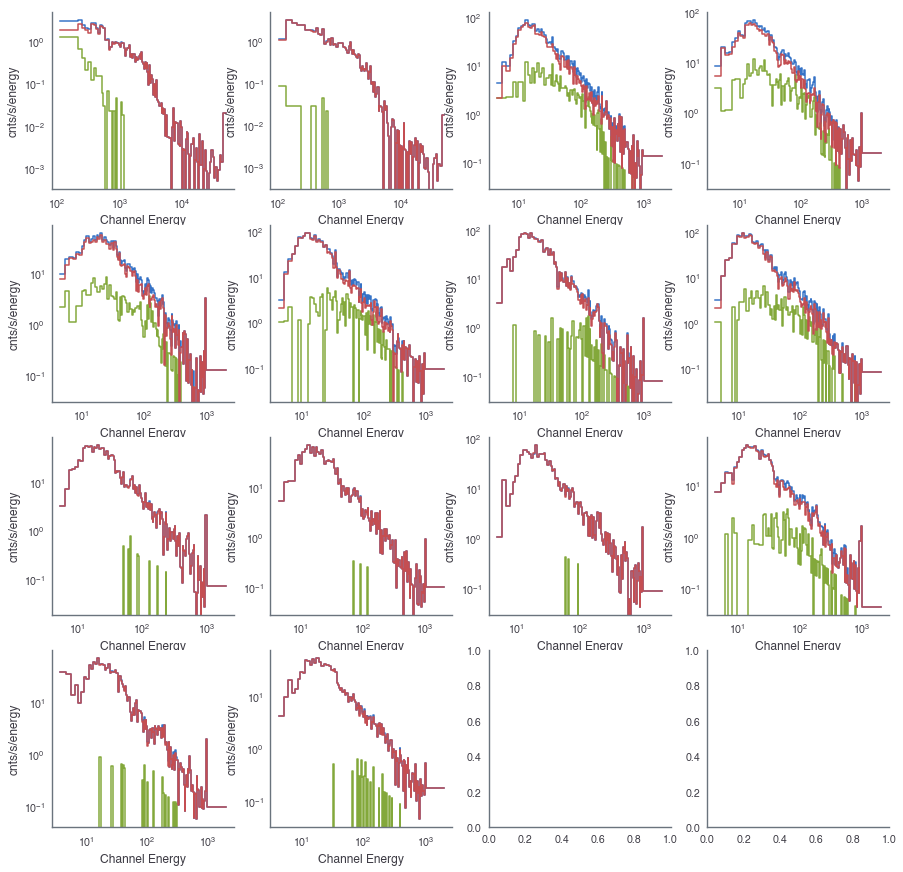

In [18]:
fig, axes = plt.subplots(4,4,sharex=False,sharey=False,figsize=(15,15))
row=0
col = 0

for key in grb_reload.keys:
    ax = axes[row][col]
    
    lightcurve = grb_reload[key]['lightcurve']
    
    lightcurve.display_count_spectrum(tmin=0, tmax=5, ax=ax)
    lightcurve.display_count_spectrum_source(tmin=0, tmax=5, ax=ax)
    lightcurve.display_count_spectrum_background(tmin=0, tmax=5, ax=ax)

    if col < 3:
        col+=1
    else:
        row+=1
        col=0

## Convert HDF5 to standard FITS files 

In [22]:
cosmogrb.grbsave_to_gbm_fits("test_grb.h5")
!ls SynthGRB_*

SynthGRB_b0.fits      SynthGRB_n3.fits      SynthGRB_n7rsp_n7.rsp
SynthGRB_b0.rsp       SynthGRB_n3.rsp       SynthGRB_n8.fits
SynthGRB_b0rsp_b0.rsp SynthGRB_n3rsp_n3.rsp SynthGRB_n8.rsp
SynthGRB_b1.rsp       SynthGRB_n4.fits      SynthGRB_n8rsp_n8.rsp
SynthGRB_b1rsp_b1.rsp SynthGRB_n4.rsp       SynthGRB_n9.fits
SynthGRB_n0.fits      SynthGRB_n4rsp_n4.rsp SynthGRB_n9.rsp
SynthGRB_n0.rsp       SynthGRB_n5.fits      SynthGRB_n9rsp_n9.rsp
SynthGRB_n0rsp_n0.rsp SynthGRB_n5.rsp       SynthGRB_na.fits
SynthGRB_n1.fits      SynthGRB_n5rsp_n5.rsp SynthGRB_na.rsp
SynthGRB_n1.rsp       SynthGRB_n6.fits      SynthGRB_narsp_na.rsp
SynthGRB_n1rsp_n1.rsp SynthGRB_n6.rsp       SynthGRB_nb.fits
SynthGRB_n2.fits      SynthGRB_n6rsp_n6.rsp SynthGRB_nb.rsp
SynthGRB_n2.rsp       SynthGRB_n7.fits      SynthGRB_nbrsp_nb.rsp
SynthGRB_n2rsp_n2.rsp SynthGRB_n7.rsp
